In [51]:
import skimage
print(skimage.__version__)
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import cv2
from skimage import data
from skimage import io
from skimage import color
from skimage import filters
from skimage import util
from google.colab.patches import cv2_imshow
import time
import glob
import os
from scipy.stats import bootstrap
import matplotlib.pyplot as plt
import torchvision.transforms as t

0.19.3
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
runs = 10**4
H_SIZE = 5
W_SIZE = 5

(404, 554, 3)


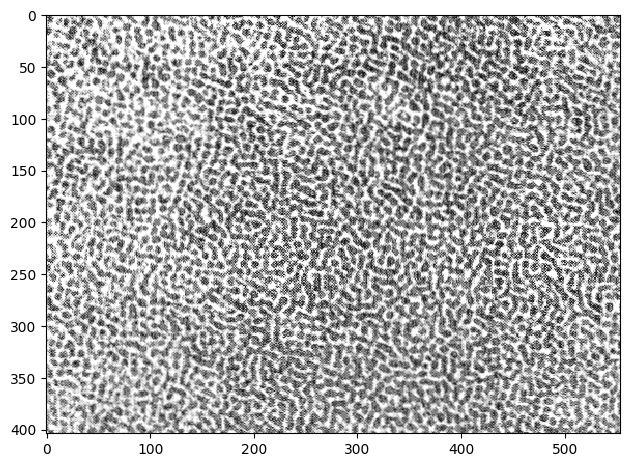

In [3]:
O = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/Okada_c.png')
print(np.shape(O))
io.imshow(O)

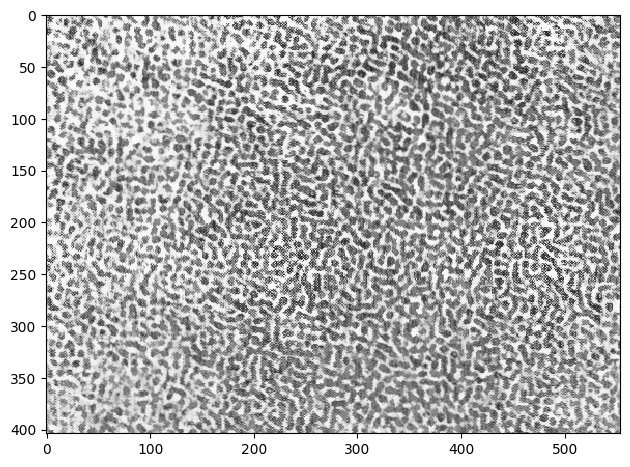

In [4]:
O = cv2.bilateralFilter(O,10,100,100)
io.imshow(O)

In [5]:
Sim_O=cv2.imread('/content/drive/MyDrive/Colab_Notebooks/Sim_O.png')
print(np.shape(Sim_O))
io.imshow(Sim_O)

(522, 522, 3)


In [6]:
O = cv2.cvtColor(O, cv2.COLOR_BGR2GRAY)
Sim_O = cv2.cvtColor(Sim_O, cv2.COLOR_BGR2GRAY)

In [7]:
retO,threshO = cv2.threshold(O,200,255,0)
retSim_O,threshSim_O = cv2.threshold(Sim_O,200,255,0)

In [8]:
cv2.imwrite(os.path.join('/content/drive/MyDrive/Colab_Notebooks/O_bw.png'),threshO)
O_bw = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/O_bw.png')
cv2_imshow(O_bw)
cv2.waitKey(0)
cv2.destroyAllWindows()

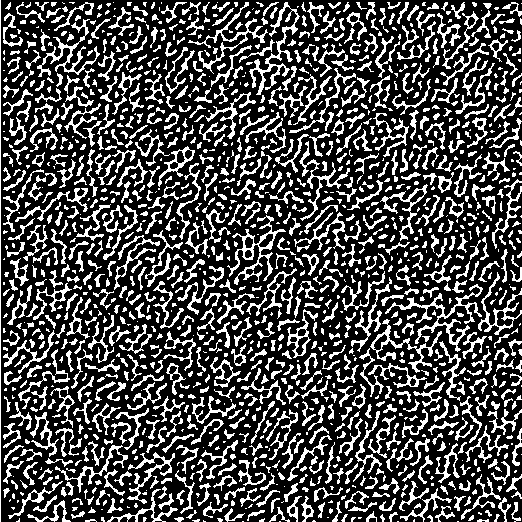

In [9]:
cv2.imwrite(os.path.join('/content/drive/MyDrive/Colab_Notebooks/Sim_O_bw.png'),threshSim_O)
Sim_bw = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/Sim_O_bw.png')
cv2_imshow(Sim_bw)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
print(O_bw.shape)
print(Sim_bw.shape)

(404, 554, 3)
(522, 522, 3)


True

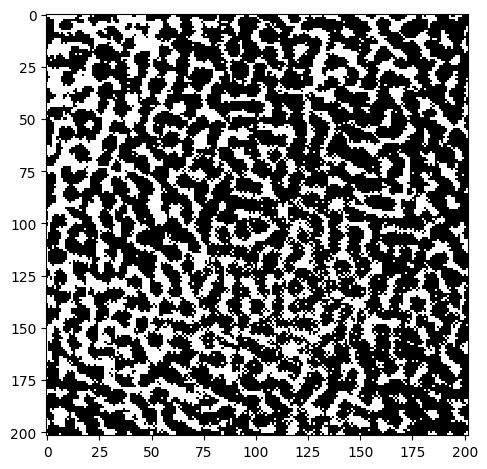

In [11]:
O_bw_focus = O_bw[101:303,101:303,:]
io.imshow(O_bw_focus)
cv2.imwrite(os.path.join('/content/drive/MyDrive/Colab_Notebooks/O_bw_focus.png'),O_bw_focus)

In [12]:
Sim_bw_focus = Sim_bw[101:303,101:303,:]
io.imshow(Sim_bw_focus)
cv2.imwrite(os.path.join('/content/drive/MyDrive/Colab_Notebooks/Sim_bw_focus.png'),Sim_bw_focus)

True

In [13]:
O_bw_focus = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/O_bw_focus.png')
Sim_bw_focus = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/Sim_bw_focus.png')

In [14]:
O_bw_focus = cv2.cvtColor(O_bw_focus, cv2.COLOR_BGR2GRAY)
Sim_bw_focus = cv2.cvtColor(Sim_bw_focus, cv2.COLOR_BGR2GRAY)

In [15]:
percent_blk_Sim_focus= cv2.countNonZero(Sim_bw_focus)/(Sim_bw_focus.shape[0]*Sim_bw_focus.shape[1])*100
print("The overall percentatge of black pixles in the Okada Simulation is: ", percent_blk_Sim_focus)
percent_blk_O_bw_focus= cv2.countNonZero(O_bw_focus)/(O_bw_focus.shape[0]*O_bw_focus.shape[1])*100
print("The overall percentatge of black pixles in the Okada image is: ", percent_blk_O_bw_focus)

The overall percentatge of black pixles in the Okada Simulation is:  28.631996863052645
The overall percentatge of black pixles in the Okada image is:  36.11165572002745


In [23]:
img = Sim_bw_focus
img2=img;
height, width = img.shape
O_Sim_blk_percent_array = np.zeros((H_SIZE,W_SIZE))
for ih in range(H_SIZE):
   for iw in range(W_SIZE):
      x = width/W_SIZE * iw
      y = height/H_SIZE * ih
      h = (height / H_SIZE)
      w = (width / W_SIZE )
      img = img[int(y):int(y+h), int(x):int(x+w)]
      NAME = str(time.time())
      cv2.imwrite(os.path.join('/content/drive/MyDrive/Colab_Notebooks/Okada_sim_sub_' + str(H_SIZE*W_SIZE) + '_' + str(ih)+str(iw) +  '.png'),img)
      O_Sim_bw_temp = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/Okada_sim_sub_' + str(H_SIZE*W_SIZE) + '_' + str(ih)+str(iw) +  '.png')
      O_Sim_bw_temp = cv2.cvtColor(O_Sim_bw_temp, cv2.COLOR_BGR2GRAY)
      O_Sim_blk_percent_array[ih,iw] = (cv2.countNonZero(O_Sim_bw_temp)/(O_Sim_bw_temp.shape[0]*O_Sim_bw_temp.shape[1]))*100
      img = img2
O_Sim_blk_mean_comp = np.mean(O_Sim_blk_percent_array)
print("The mean percentage of black pixles for our simulation if we divide the image into:" , H_SIZE*W_SIZE, "equal sections is: ", O_Sim_blk_mean_comp)
O_Sim_blk_std = np.std(O_Sim_blk_percent_array)
print ("With a standard devaition between sections of: ", O_Sim_blk_std)

The mean percentage of black pixles for our simulation if we divide the image into: 25 equal sections is:  28.63987656157049
With a standard devaition between sections of:  1.8265705744117415


In [25]:
img = O_bw_focus
img2=img;
height, width = img.shape
O_blk_percent_array = np.zeros((H_SIZE,W_SIZE))
for ih in range(H_SIZE):
   for iw in range(W_SIZE):
      x = width/W_SIZE * iw
      y = height/H_SIZE * ih
      h = (height / H_SIZE)
      w = (width / W_SIZE )
      img = img[int(y):int(y+h), int(x):int(x+w)]
      NAME = str(time.time())
      cv2.imwrite(os.path.join('/content/drive/MyDrive/Colab_Notebooks/Okada_sub_' + str(H_SIZE*W_SIZE) + '_' + str(ih)+str(iw) +  '.png'),img)
      O_bw_temp = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/Okada_sub_' + str(H_SIZE*W_SIZE) + '_' + str(ih)+str(iw) +  '.png')
      O_bw_temp = cv2.cvtColor(O_bw_temp, cv2.COLOR_BGR2GRAY)
      O_blk_percent_array[ih,iw] = (cv2.countNonZero(O_bw_temp)/(O_bw_temp.shape[0]*O_bw_temp.shape[1]))*100
      img = img2
O_blk_mean_comp = np.mean(O_blk_percent_array)
print("The mean percentage of black pixles for the Okada image if we divide the image into:" , H_SIZE*W_SIZE, "equal sections is: ", O_blk_mean_comp)
O_blk_std = np.std(O_blk_percent_array)
print ("With a standard devaition between sections of: ", O_blk_std)

The mean percentage of black pixles for the Okada image if we divide the image into: 25 equal sections is:  36.169238548483044
With a standard devaition between sections of:  5.602195625426238


In [26]:
bins = np.linspace(0,100,50)
O_Sim_blk_percent_array = np.reshape(O_Sim_blk_percent_array,(H_SIZE*W_SIZE))
O_blk_percent_array = np.reshape(O_blk_percent_array,(H_SIZE*W_SIZE))
plt.hist(O_Sim_blk_percent_array, bins = bins, alpha = 0.5, label='Simulation Raw')
plt.hist(O_blk_percent_array, bins = bins, alpha = 0.5, label='Okada Raw')
plt.axvline(O_Sim_blk_percent_array.mean(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(O_blk_percent_array.mean(), color='orange', linestyle='dashed', linewidth=1)
plt.legend(loc='upper right')
plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Okada_comparison_raw_' + str(H_SIZE*W_SIZE) + '.png')
plt.show()
print("Vertical lines indicate the mean of the data with the associated data color")

Vertical lines indicate the mean of the data with the associated data color


In [31]:
O_vs_Sim_RMSE = skimage.metrics.normalized_root_mse(O_bw_focus.astype(float), Sim_bw_focus.astype(float), normalization = 'min-max')
O_vs_Sim_PSNR = skimage.metrics.peak_signal_noise_ratio(O_bw_focus.astype(float), Sim_bw_focus.astype(float), data_range = O_bw_focus.max()-O_bw_focus.min())
O_vs_Sim_SSIM = skimage.metrics.structural_similarity(O_bw_focus.astype(float), Sim_bw_focus.astype(float))
results_secondary = pd.DataFrame([O_vs_Sim_RMSE, O_vs_Sim_PSNR, O_vs_Sim_SSIM],['Sim RMSE','Sim PSNR', 'Sim SSIM'], columns = ['Stat'])
display(results_secondary)

Stat
Sim RMSE  0.661294
Sim PSNR  3.592105
Sim SSIM  0.006312

In [34]:
print(O_bw_focus.shape)
print(Sim_bw_focus.shape)
pixel_count = 202**2;

(202, 202)
(202, 202)


In [36]:
O_vs_Sim_cc = np.concatenate([O_bw_focus.reshape((pixel_count,1)),Sim_bw_focus.reshape((pixel_count,1))],1)
O_vs_Sim_cc = pd.DataFrame(O_vs_Sim_cc)
O_vs_Sim_cc = O_vs_Sim_cc.corr()
O_vs_Sim_cc = np.array(O_vs_Sim_cc)
print('The correlation coefficient, pixel-for-pixel of the Simulation vs Okada is: ', O_vs_Sim_cc[0,1])

The correlation coefficient, pixel-for-pixel of the Simulation vs Okada is:  0.007683772098984515


In [37]:
cd /content/drive/MyDrive/Colab_Notebooks/LPIPS

/content/drive/MyDrive/Colab_Notebooks/LPIPS


In [49]:
import lpips
import torch

In [52]:
from matplotlib.backend_bases import transforms
O_bw_8 = (O_bw_focus*255).astype(np.uint8)
Sim_bw_8 = (Sim_bw_focus*255).astype(np.uint8)
O_bw_jpg = skimage.io.imsave('/content/drive/MyDrive/Colab_Notebooks/O_bw_8.jpg',O_bw_8);
Sim_bw_jpg = skimage.io.imsave('/content/drive/MyDrive/Colab_Notebooks/O_Sim_bw_8.jpg', Sim_bw_8)
O_Sim_bw = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/O_Sim_bw_8.jpg')
O_bw = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/O_bw_8.jpg')
O_Sim_color = cv2.cvtColor(O_Sim_bw, cv2.COLOR_BGR2RGB)
O_color = cv2.cvtColor(O_bw, cv2.COLOR_BGR2RGB)
transform = t.Compose([t.ToTensor()])
O_tensor = transform(O_color)
O_Sim_tensor = transform(O_Sim_color)
loss_fn = lpips.LPIPS(net='alex')
d = loss_fn.forward(O_tensor,O_Sim_tensor)
Sim_LPIPS = d.item()
print(Sim_LPIPS)

<ipython-input-52-cdcc0067232e>:4: UserWarning: /content/drive/MyDrive/Colab_Notebooks/O_bw_8.jpg is a low contrast image
  O_bw_jpg = skimage.io.imsave('/content/drive/MyDrive/Colab_Notebooks/O_bw_8.jpg',O_bw_8);
<ipython-input-52-cdcc0067232e>:5: UserWarning: /content/drive/MyDrive/Colab_Notebooks/O_Sim_bw_8.jpg is a low contrast image
  Sim_bw_jpg = skimage.io.imsave('/content/drive/MyDrive/Colab_Notebooks/O_Sim_bw_8.jpg', Sim_bw_8)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAU

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 99.0MB/s]


Loading model from: /content/drive/MyDrive/Colab_Notebooks/LPIPS/lpips/weights/v0.1/alex.pth
0.001210418762639165


In [53]:
LPIPS_results = pd.DataFrame([Sim_LPIPS],['Simulation LPIPS'], columns = ['Stat'])
Linear_cc_results = pd.DataFrame([O_vs_Sim_cc[0,1]], ['Simulation Linear Correlation Coefficient'], columns = ['Stat'])
Percent_blk_results = pd.DataFrame([percent_blk_O_bw_focus, percent_blk_Sim_focus], ['Percent Black Okada', 'Percent Black Simulation'], columns = ['Stat'])
Percent_blk_std_results = pd.DataFrame([O_blk_std, O_Sim_blk_std],['STD of Percent Black Okada', 'STD of Percent Black Simulation'], columns = ['Stat'])
Overall_results = pd.concat([Percent_blk_results,Percent_blk_std_results,Linear_cc_results,results_secondary,LPIPS_results])
display(Overall_results)
fig, ax = plt.subplots(1, 1)
ax.axis('off')
ax.axis('tight')
ax.table(cellText = Overall_results.values, rowLabels = Overall_results.index, colLabels=Overall_results.columns, loc='center')
plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Okada_image_analysis_results.png', orientation = 'landscape', bbox_inches = 'tight')
plt.show()

Stat
Percent Black Okada                        36.111656
Percent Black Simulation                   28.631997
STD of Percent Black Okada                  5.602196
STD of Percent Black Simulation             1.826571
Simulation Linear Correlation Coefficient   0.007684
Sim RMSE                                    0.661294
Sim PSNR                                    3.592105
Sim SSIM                                    0.006312
Simulation LPIPS                            0.001210